In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")
trade  = pd.read_csv("international_trade.csv")
sample = pd.read_csv("sample_submission.csv")

In [8]:
sample

,ID,answer
0,TG_A_J_20230304,0
1,TG_A_J_20230305,0
2,TG_A_J_20230306,0
3,TG_A_J_20230307,0
4,TG_A_J_20230308,0
...,...,...
1087,RD_F_J_20230327,0
1088,RD_F_J_20230328,0
1089,RD_F_J_20230329,0
1090,RD_F_J_20230330,0


In [6]:
trade

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
...,...,...,...,...,...,...,...
1269,2023-02,포포(papaw)[파파야(papaya)],0,0,23830,71,-71
1270,2023-02,사과,135165,351,0,0,351
1271,2023-02,배,2206012,5411,1,0,5411
1272,2023-02,신 체리[프루너스 체라서스(Prunus cerasus)],5,0,0,0,0


In [3]:
df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [11]:
trade[["기간", "품목명"]].groupby("품목명").count()

,기간
품목명,
감귤,50
결구(結球) 상추,50
구아바(guava),23
그레이프프루트(grapefruit)와 포멜로(pomelo),50
꽃양배추와 브로콜리(broccoli),50
당근,50
대추야자,50
레몬[시트러스 리몬(Citrus limon)ㆍ시트러스 리머늄(Citrus limonum)],50
망고(mango),50


# EDA

In [29]:
# 우리가 예측해야하는 것들 >> 품목+법인+지역만 해도 38개...
df[["item","corporation", "location"]].groupby(["item", "corporation", "location"]).count().reset_index()

,item,corporation,location
0,BC,A,J
1,BC,A,S
2,BC,B,J
3,BC,B,S
4,BC,C,J
5,BC,C,S
6,BC,D,J
7,BC,E,J
8,BC,E,S
9,CB,A,J


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


In [16]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           59397 non-null  object        
 1   timestamp    59397 non-null  datetime64[ns]
 2   item         59397 non-null  object        
 3   corporation  59397 non-null  object        
 4   location     59397 non-null  object        
 5   supply(kg)   59397 non-null  float64       
 6   price(원/kg)  59397 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 3.2+ MB


### 농산물 별 EDA

In [47]:
from matplotlib import rc
import platform

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    rc('font', family='AppleGothic')
else: #linux
    rc('font', family='NanumGothic')
    
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 현상 해결 코드

In [42]:
df.item.unique()

array(['TG', 'CR', 'CB', 'RD', 'BC'], dtype=object)

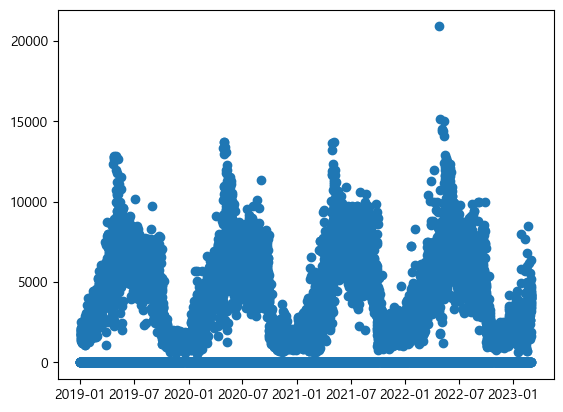

In [62]:
plt.scatter(df[df["item"] == "TG"]["timestamp"], df[df["item"] == "TG"]["price(원/kg)"])

Text(0.5, 1.0, '브로콜리 가격 그래프')

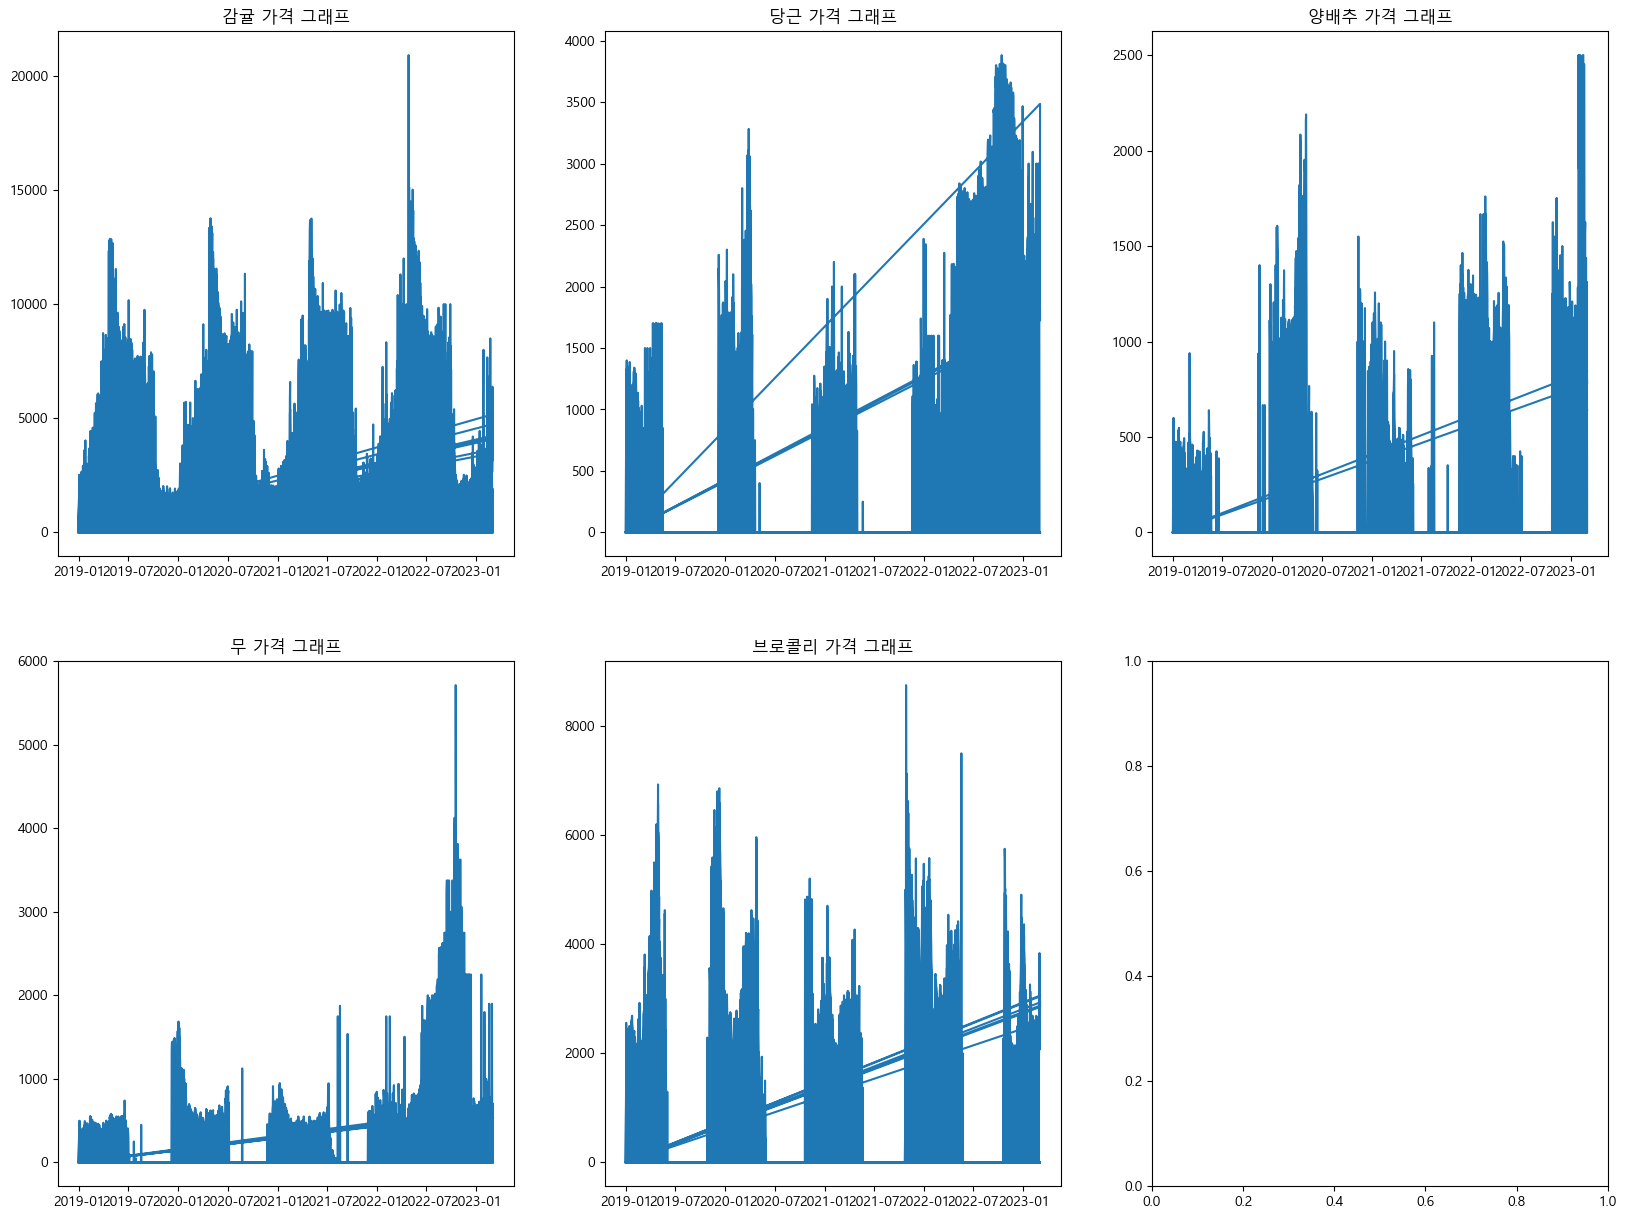

In [91]:
f, axes  = plt.subplots(2,3)
f.set_size_inches((20,15))

axes[0,0].plot(df[df["item"] == "TG"]["timestamp"], df[df["item"] == "TG"]["price(원/kg)"])
axes[0,0].set_title("감귤 가격 그래프")

axes[0,1].plot(df[df["item"] == "CR"]["timestamp"], df[df["item"] == "CR"]["price(원/kg)"])
axes[0,1].set_title("당근 가격 그래프")

axes[0,2].plot(df[df["item"] == "CB"]["timestamp"], df[df["item"] == "CB"]["price(원/kg)"])
axes[0,2].set_title("양배추 가격 그래프")

axes[1,0].plot(df[df["item"] == "RD"]["timestamp"], df[df["item"] == "RD"]["price(원/kg)"])
axes[1,0].set_title("무 가격 그래프")

axes[1,1].plot(df[df["item"] == "BC"]["timestamp"], df[df["item"] == "BC"]["price(원/kg)"])
axes[1,1].set_title("브로콜리 가격 그래프")

In [95]:
df[df["item"] == "BC"]["price(원/kg)"]

42644       0.0
42645       0.0
42646    2559.0
42647    2425.0
42648    2097.0
          ...  
56346    2488.0
56347    3232.0
56348    3816.0
56349    3321.0
56350    2939.0
Name: price(원/kg), Length: 13707, dtype: float64

In [109]:
nongsan

['RD', 'TG', 'BC', 'CR', 'CB']

In [103]:
nongsan = []
for i in set(df["item"].tolist()):
    nongsan.append(i)

nongsan_price = []
for i in nongsan:
    nongsan_price.append(df[df["item"]==i]["price(원/kg)"].tolist())

<Axes: >

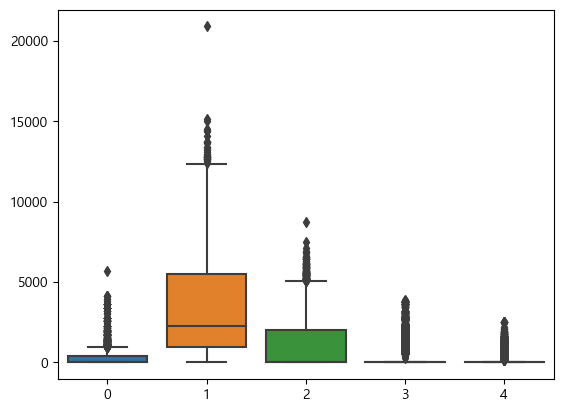

In [108]:
import seaborn as sns
sns.boxplot(nongsan_price)

In [84]:
price.iloc[1]

375.0

In [87]:
df[df["price(원/kg)"] ==price.iloc[1]]

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
31549,CB_E_J_20211225,2021-12-25,CB,E,J,432.0,375.0
32036,RD_A_J_20190223,2019-02-23,RD,A,J,8560.0,375.0
32446,RD_A_J_20200408,2020-04-08,RD,A,J,42180.0,375.0
33155,RD_A_J_20220318,2022-03-18,RD,A,J,4460.0,375.0
33929,RD_A_S_20200228,2020-02-28,RD,A,S,25360.0,375.0
34345,RD_A_S_20210419,2021-04-19,RD,A,S,98960.0,375.0
35787,RD_C_S_20210128,2021-01-28,RD,C,S,17200.0,375.0
36527,RD_C_S_20230207,2023-02-07,RD,C,S,4300.0,375.0
36629,RD_D_J_20190319,2019-03-19,RD,D,J,4280.0,375.0
37335,RD_D_J_20210222,2021-02-22,RD,D,J,13980.0,375.0
